In [37]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
# Import train and test
X_train = pd.read_csv('train_X.csv', header=None)
X_test = pd.read_csv('test_X.csv', header=None)
y_train = np.transpose(pd.read_csv('train_Y.csv', header=None))
y_test = np.transpose(pd.read_csv('test_Y.csv', header=None))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# X_train = X_train[:,[0,2,4]]
# X_test = X_test[:,[0,2,4]]

In [27]:
# One Hot
ohe = OneHotEncoder()
y = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X_train)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [28]:
X_train.shape

(41439, 135)

In [47]:
# Neural network
dim = X_train.shape
model = Sequential()
model.add(Dense(16, input_dim=dim[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
648/648 [==============================] - 2s 1ms/step - loss: 1.2869 - accuracy: 0.4148 - val_loss: 1.1480 - val_accuracy: 0.5173
Epoch 2/100
648/648 [==============================] - 1s 1ms/step - loss: 1.0404 - accuracy: 0.5813 - val_loss: 0.9472 - val_accuracy: 0.6408
Epoch 3/100
648/648 [==============================] - 1s 993us/step - loss: 0.8780 - accuracy: 0.6639 - val_loss: 0.8285 - val_accuracy: 0.6947
Epoch 4/100
648/648 [==============================] - 1s 975us/step - loss: 0.7680 - accuracy: 0.7091 - val_loss: 0.7348 - val_accuracy: 0.7407
Epoch 5/100
648/648 [==============================] - 1s 1ms/step - loss: 0.6872 - accuracy: 0.7453 - val_loss: 0.6778 - val_accuracy: 0.7600
Epoch 6/100
648/648 [==============================] - 1s 1ms/step - loss: 0.6278 - accuracy: 0.7759 - val_loss: 0.6278 - val_accuracy: 0.7872
Epoch 7/100
648/648 [==============================] - 1s 972us/step - loss: 0.5811 - accuracy: 0.7981 - val_loss: 0.5896 - val_accuracy: 

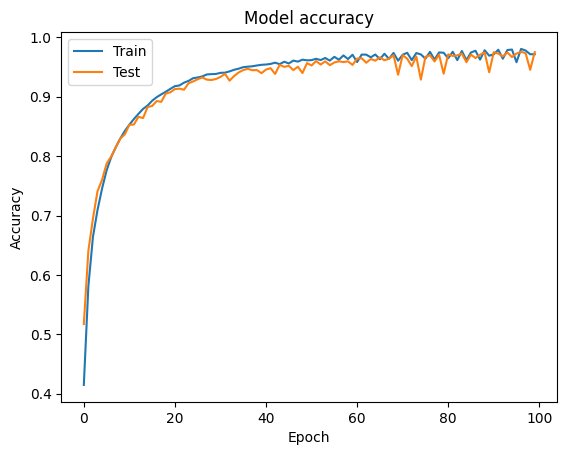

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

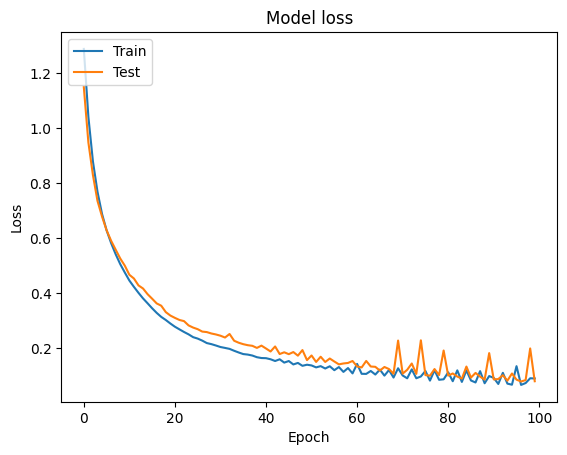

In [50]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()